In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [17]:
len(train_data[15])

76

In [5]:
train_labels[10]

3

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
np.zeros

<function numpy.zeros>

In [12]:
results = np.zeros((len(train_data), 10000))


In [13]:
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [20]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [21]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [25]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 835us/step - loss: 2.6135 - accuracy: 0.5199 - val_loss: 1.6978 - val_accuracy: 0.6570
Epoch 2/20
7982/7982 [==============================] - 2s 215us/step - loss: 1.4099 - accuracy: 0.6998 - val_loss: 1.3180 - val_accuracy: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 206us/step - loss: 1.0675 - accuracy: 0.7666 - val_loss: 1.1604 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 2s 203us/step - loss: 0.8483 - accuracy: 0.8232 - val_loss: 1.0507 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 2s 203us/step - loss: 0.6722 - accuracy: 0.8611 - val_loss: 0.9931 - val_accuracy: 0.7910
Epoch 6/20
7982/7982 [==============================] - 2s 203us/step - loss: 0.5360 - accuracy: 0.8884 - val_loss: 0.9461 - val_accuracy: 0.8010
Epoch 7/20
7982/7982 [==============================] - 2s 202us/step - loss

In [26]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<Figure size 640x480 with 1 Axes>

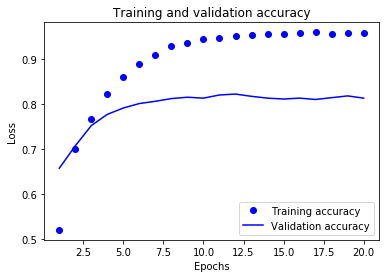

In [29]:
plt.clf()
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 449us/step - loss: 2.5732 - accuracy: 0.5246 - val_loss: 1.7235 - val_accuracy: 0.6450
Epoch 2/9
7982/7982 [==============================] - 2s 194us/step - loss: 1.3948 - accuracy: 0.7073 - val_loss: 1.2827 - val_accuracy: 0.7160
Epoch 3/9
7982/7982 [==============================] - 2s 194us/step - loss: 1.0263 - accuracy: 0.7769 - val_loss: 1.1048 - val_accuracy: 0.7630
Epoch 4/9
7982/7982 [==============================] - 2s 197us/step - loss: 0.8114 - accuracy: 0.8256 - val_loss: 1.0249 - val_accuracy: 0.7710
Epoch 5/9
7982/7982 [==============================] - 2s 198us/step - loss: 0.6565 - accuracy: 0.8599 - val_loss: 0.9556 - val_accuracy: 0.7940
Epoch 6/9
7982/7982 [==============================] - 2s 196us/step - loss: 0.5284 - accuracy: 0.8880 - val_loss: 0.9304 - val_accuracy: 0.8010
Epoch 7/9
7982/7982 [==============================] - 2s 197us/step - loss: 0.426

In [1]:
results

NameError: name 'results' is not defined